In [1]:
import sqlite3
import pandas as pd

# Connect to your SQLite DB file (since it's in the same folder)
conn = sqlite3.connect("sales_data.db")

# Query example: Total sales by region
query = """
SELECT Region, SUM(Sales) AS Total_Sales
FROM sales
GROUP BY Region;
"""

# Execute query and load into DataFrame
df = pd.read_sql_query(query, conn)
df


,Region,Total_Sales
0,Central,501239.8908
1,East,678781.2400
2,South,391721.9050
3,West,725457.8245


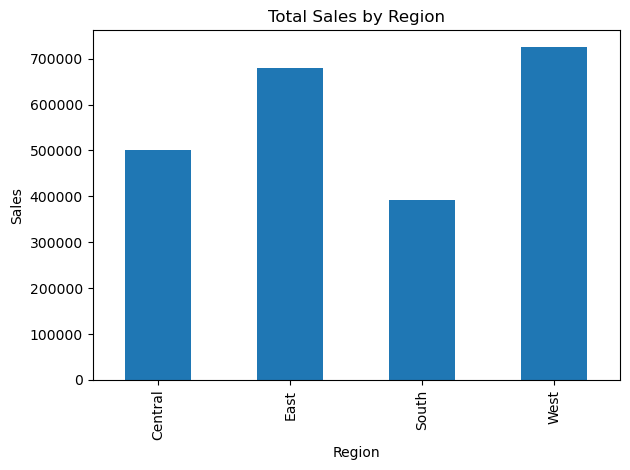

In [3]:
import matplotlib.pyplot as plt

# Bar chart of total sales by region
df.plot(kind='bar', x='Region', y='Total_Sales', legend=False)
plt.title("Total Sales by Region")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


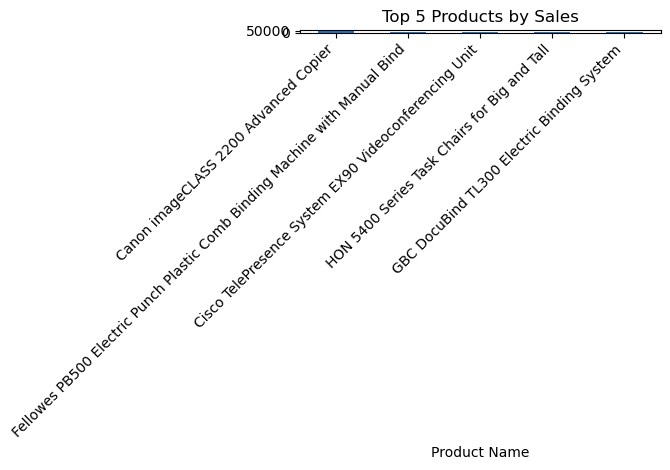

In [4]:
query = """
SELECT [Product Name], SUM(Sales) AS Product_Sales
FROM sales
GROUP BY [Product Name]
ORDER BY Product_Sales DESC
LIMIT 5;
"""
df_top = pd.read_sql_query(query, conn)
df_top.plot(kind='bar', x='Product Name', y='Product_Sales', legend=False)
plt.title("Top 5 Products by Sales")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


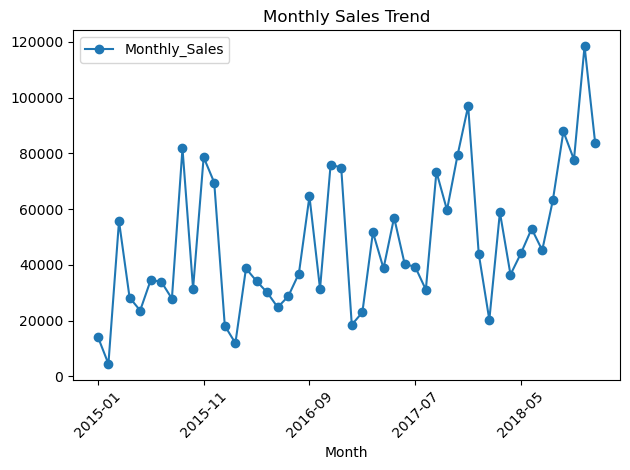

In [5]:
query = """
SELECT substr([Order Date], 1, 7) AS Month, SUM(Sales) AS Monthly_Sales
FROM sales
GROUP BY Month
ORDER BY Month;
"""
df_monthly = pd.read_sql_query(query, conn)
df_monthly.plot(x='Month', y='Monthly_Sales', kind='line', marker='o')
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


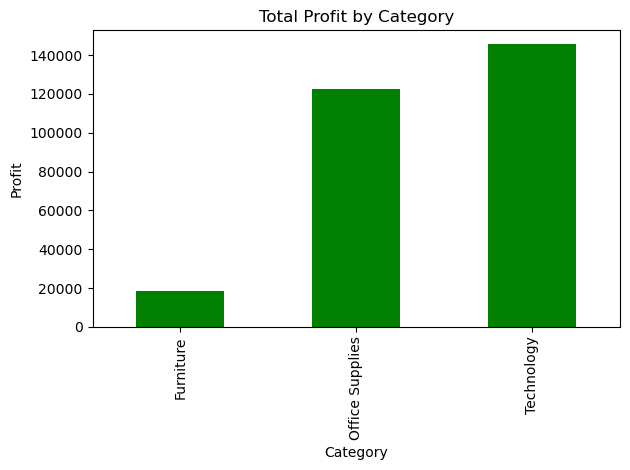

In [6]:
query = """
SELECT Category, SUM(Profit) AS Total_Profit
FROM sales
GROUP BY Category;
"""
df_cat = pd.read_sql_query(query, conn)
df_cat.plot(kind='bar', x='Category', y='Total_Profit', legend=False, color='green')
plt.title("Total Profit by Category")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()
